# 4 - Validation - Reproduce Cumulative Installations and Waste from Heath 2020

This journal will reproduce the results from Garvin Heath & Tim Silverman's paper 2020. Plotting Cumulative Installations and Cumulative Waste, such that:

![Garvin Results](../images_wiki/GARVIN_2020.PNG)

Input is from IRENA projections:
![Input from IRENA_projections](../images_wiki/IRENA_projections.PNG)

Notes on IRENA Data:
- Installation Data < 2010 from D. Jordan (Values too low to digitize properly)
- Installation data >= 2010 from IRENA report (digitized from plot)


Other considerations:
  <ul> 
    <li> Global projected installations from IEA/IRENA (picture below). </li>
    <li> No recycling, no reuse, no repair.  </li>
    <li> 30-year average lifetime with early lifetime failures </li>
    <li> Power to Glass conversion: 76 t/MW </li>
</ul>

In [39]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [40]:
import PV_ICE

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

## PV ICE

In [42]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='PV_ICE', file=r'..\baselines\baseline_modules_World_Irena_2019.csv')
r1.scenario['PV_ICE'].addMaterial('glass', file=r'..\baselines\baseline_material_glass_Irena_2019.csv')

r1.createScenario(name='PV_ICE_base', file=r'..\baselines\baseline_modules_World_Irena_2019.csv')
r1.scenario['PV_ICE_base'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')


r1.createScenario(name='A_MassBased', file=r'..\baselines\baseline_modules_World_Irena_2019_A_MassBased.csv')
r1.scenario['A_MassBased'].addMaterial('glass', file=r'..\baselines\baseline_material_glass_Irena_A_MassBased.csv')

r1.createScenario(name='B_PowerBased', file=r'..\baselines\baseline_modules_World_Irena_2019_B_PowerBased.csv')
r1.scenario['B_PowerBased'].addMaterial('glass', file=r'..\baselines\baseline_material_glass_Irena_B_PowerBased.csv')

path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [70]:
r1.scenario['PV_ICE'].data['mod_lifetime'] = 30
r1.scenario['PV_ICE_base'].data['mod_lifetime'] = 30
r1.scenario['A_MassBased'].data['mod_lifetime'] = 30
r1.scenario['B_PowerBased'].data['mod_lifetime'] = 30


Plot same plot from Garvin's paper from digitized data input

(0.0, 400.0)

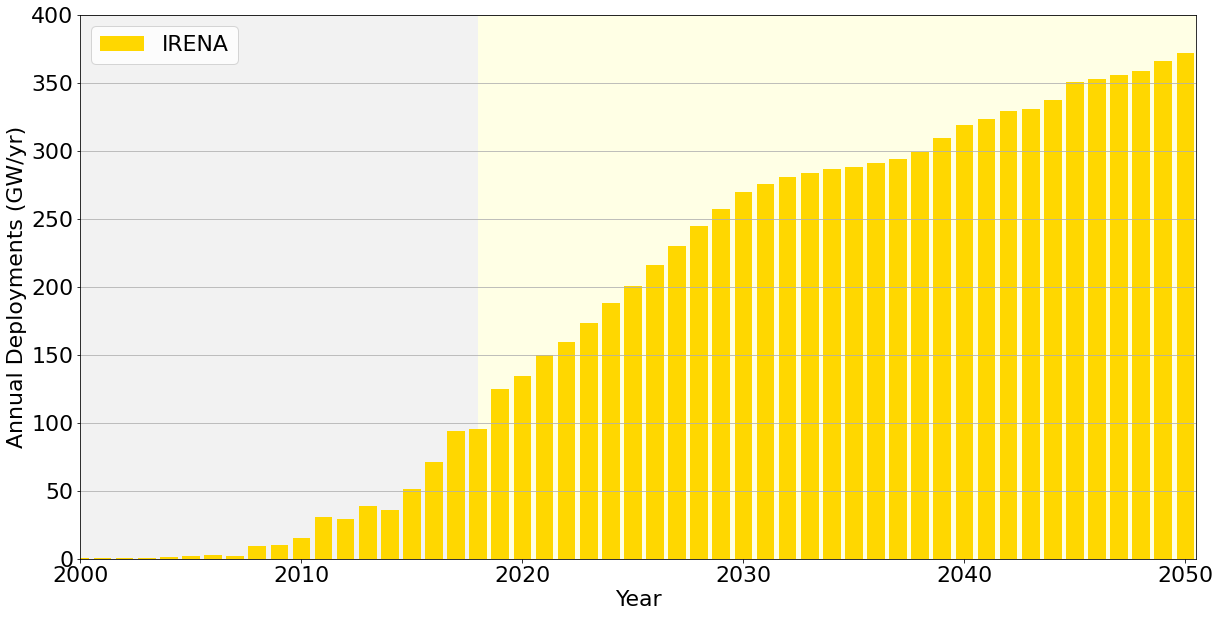

In [71]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(111)
ax1.yaxis.grid()
plt.axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
plt.axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
ax1.bar(r1.scenario['PV_ICE'].data['year'], r1.scenario['PV_ICE'].data['new_Installed_Capacity_[MW]']/1000, color='gold', label='IRENA')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Annual Deployments (GW/yr)')
plt.xlim([2000, 2050.5])
plt.ylim([0, 400])


#### Adjusting input parameters to represent the inputs from the IRENA analysis:

In [72]:
IRENA= True
ELorRL = 'RL'
if IRENA:
    if ELorRL == 'RL':
        weibullInputParams = {'alpha': 5.3759}  # Regular-loss scenario IRENA
    if ELorRL == 'EL':
        weibullInputParams = {'alpha': 2.49}  # Regular-loss scenario IRENA
    r1.calculateMassFlow(weibullInputParams=weibullInputParams, weibullAlphaOnly=True)
    title_Method = 'Irena_'+ELorRL
else:
    r1.calculateMassFlow()
    title_Method = 'PVICE'


Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  PV_ICE_base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  A_MassBased
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  B_PowerBased
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


## Irena Conversion from Mass to Energy --> 
mat_Total_Landfilled is in g, 1 t --> 907.185 kg 
 1 MW --> 76 t conversion for the Mass in PV service.

Querying some of the values for plotting the flags

In [73]:
x2020 = r1.scenario['PV_ICE'].data['year'].iloc[25]
y2020 = r1.scenario['PV_ICE'].data['Installed_Capacity_[W]'].iloc[25]*76/1000000
t2020 = r1.scenario['PV_ICE'].data['Installed_Capacity_[W]'].iloc[25]/(1E12)


x2030 = r1.scenario['PV_ICE'].data['year'].iloc[35]
y2030 = r1.scenario['PV_ICE'].data['Installed_Capacity_[W]'].iloc[35]*76/1000000
t2030 = r1.scenario['PV_ICE'].data['Installed_Capacity_[W]'].iloc[35]/(1E12)

x2050 = r1.scenario['PV_ICE'].data['year'].iloc[55]
y2050 = r1.scenario['PV_ICE'].data['Installed_Capacity_[W]'].iloc[55]*76/1000000
t2050 = r1.scenario['PV_ICE'].data['Installed_Capacity_[W]'].iloc[55]/(1E12)

print(x2050)

2050


Calculating Cumulative Waste isntead of yearly waste

Using glass for proxy of the module; glass is ~76% of the module's mass [REF]


In [74]:
cumWaste = r1.scenario['PV_ICE'].material['glass'].materialdata['mat_Total_Landfilled'].cumsum()
cumWaste = (cumWaste*100/76)/1000000  # Converting to tonnes

cumWaste0 = r1.scenario['PV_ICE_base'].material['glass'].materialdata['mat_Total_Landfilled'].cumsum()
cumWaste0 = (cumWaste0*100/76)/1000000  # Converting to tonnes


cumWaste2 = r1.scenario['A_MassBased'].material['glass'].materialdata['mat_Total_Landfilled'].cumsum()
cumWaste2 = (cumWaste2*100/76)/1000000  # Converting to tonnes

cumWaste3 = r1.scenario['B_PowerBased'].material['glass'].materialdata['mat_Total_Landfilled'].cumsum()
cumWaste3 = (cumWaste3*100/76)/1000000  # Converting to tonnes

In [75]:
x2020_irena = 2020
y2020_irena = 3.96E+07
t2020_irena = 0.5

x2030_irena = 2030
y2030_irena = 1.24E+08
t2030_irena = 1.6

x2050_irena = 2050
y2050_irena = 3.41E+08
t2050_irena = 4.5


In [76]:
Garvin2020_litCumWaste_X = [2020, 2021.1, 2022.1, 2023.2, 2024.6, 2026.3, 2027.3, 2028.7,
2029.5, 2030.6, 2032.1, 2033.8, 2035.4, 2037.5, 2039.1, 2040.6, 2042, 2044, 2045.5, 2047.3,
2048.9, 2050]

Garvin2020_litCumWaste_Y = [860414.9, 1108341.4, 1383227, 1781800.6, 2295222.2, 3355623.2,
4605006.5, 6319566.5, 7886916, 8951381, 1.15E+07, 1.44E+07, 1.85E+07, 2.31E+07,
2.89E+07, 3.49E+07, 3.96E+07, 4.79E+07, 5.44E+07, 6.57E+07, 7.00E+07, 7.95E+07]

Garvin2020_litMassService_X = [2020, 2021.1, 2022.5, 2024.1, 2025.8, 2027.8, 2030, 2031.8, 2034.5, 
                               2036.9, 2039.5, 2042.6, 2044.9, 2047.4, 2050]

Garvin2020_litMassService_Y = [3.96E+07, 4.79E+07, 5.44E+07, 6.57E+07, 7.95E+07, 1.02E+08,
1.24E+08, 1.45E+08, 1.65E+08, 1.99E+08, 2.19E+08, 2.48E+08, 2.82E+08, 3.10E+08, 3.41E+08]

In [ ]:
Irena2016_Installs_X = [ 2000, 2001, 2002, 2003, 2004, 2005,2006,2007,2008,2009,2010,2011,2012,2013,
2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,
2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,
2046,2047,2048,2049,2050]

Irena2016_Installs_Y = [34.39617, 34.39617,34.39617,34.39617,34.39617,34.39617,50.739925,
50.739925,50.739925,50.368477,50.368477,84.715126,102.09894,154.99327,207.78854,
260.63333,278.04193,330.8372,383.682,471.9382,524.80786,577.65265,648.2032,
771.99475,842.5948,948.5568,1054.6178,1196.0903,1337.5629,1496.7659,1602.827,
1744.2748,1885.8215,1956.3721,2080.114,2203.8809,2345.3782,2451.4146,2575.1812,
2752.1643,2875.8816,2999.5989,3158.901,3335.8096,3459.5764,3654.2405,
3813.493,3990.4019,4149.679,4308.8574,4485.791]



PLOT:

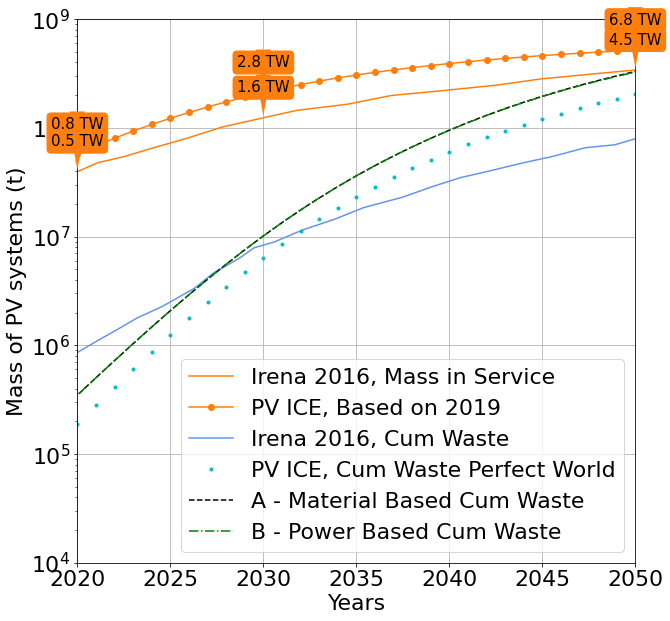

In [77]:
fig = plt.figure(figsize=(10,10))
plt.semilogy(Garvin2020_litMassService_X, Garvin2020_litMassService_Y, color='C1', label='Irena 2016, Mass in Service')
plt.semilogy(r1.scenario['PV_ICE'].data.year,r1.scenario['PV_ICE'].data['Installed_Capacity_[W]']*76/1000000, color='C1', marker='o', label='PV ICE, Based on 2019')
plt.semilogy(Garvin2020_litCumWaste_X, Garvin2020_litCumWaste_Y, color='cornflowerblue', label='Irena 2016, Cum Waste')
#plt.semilogy(r1.scenario['PV_ICE_base'].data.year,cumWaste0, color='cornflowerblue', marker='.', label='PV ICE, Cum Waste')
plt.semilogy(r1.scenario['PV_ICE'].data.year,cumWaste, 'c.', label='PV ICE, Cum Waste Perfect World')
plt.semilogy(r1.scenario['A_MassBased'].data.year,cumWaste2, 'k--', label='A - Material Based Cum Waste')
plt.semilogy(r1.scenario['B_PowerBased'].data.year,cumWaste3, 'g-.', label='B - Power Based Cum Waste')


plt.ylim([1E4, 1E9])
plt.legend()
plt.tick_params(axis='y', which='minor')
plt.xlim([2020,2050])
plt.grid()
plt.ylabel('Mass of PV systems (t)')
plt.xlabel('Years')

offset = (0, 30)

plt.annotate(
    '{:.1f} TW'.format(t2050), (x2050, y2050),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)

plt.annotate(
    '{:.1f} TW'.format(t2030), (x2030, y2030),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)


plt.annotate(
    '{:.1f} TW'.format(t2020), (x2020, y2020),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)


### IRENA

plt.annotate(
    '{:.1f} TW'.format(t2020_irena), (x2020_irena, y2020_irena),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)

plt.annotate(
    '{:.1f} TW'.format(t2030_irena), (x2030_irena, y2030_irena),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)

plt.annotate(
    '{:.1f} TW'.format(t2050_irena), (x2050_irena, y2050_irena),
    ha='center', va='center',
    size=15,
    xytext=offset, textcoords='offset points',
    bbox=dict(boxstyle='round', fc='#ff7f0e', ec='none'),
    arrowprops=dict(arrowstyle='wedge,tail_width=1.',
                    fc='#ff7f0e', ec='none',
                    relpos=(0.5, 1.5),
                    )
)

plt.show()




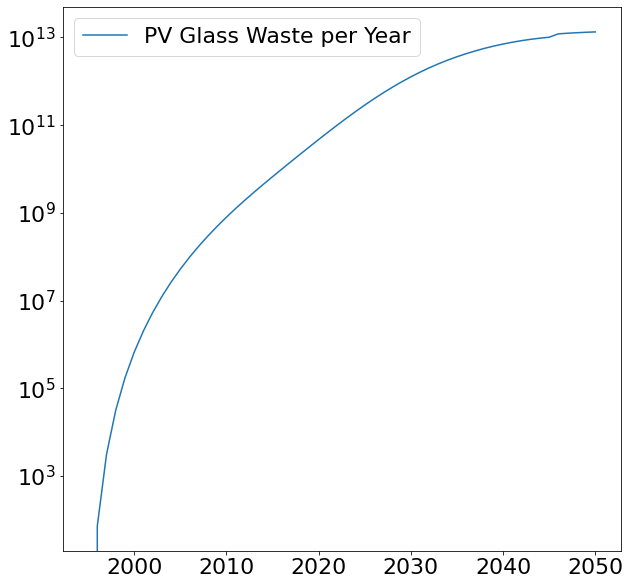

In [78]:
fig = plt.figure(figsize=(10,10))
plt.semilogy(r1.scenario['PV_ICE'].data.year,r1.scenario['PV_ICE'].material['glass'].materialdata['mat_Total_Landfilled'], label='PV Glass Waste per Year')
plt.legend()